In [13]:
# Importamos las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, confusion_matrix

In [2]:
# Insertamos esta línea de código para que los números aparezcan separados por comas

pd.options.display.float_format = "{:,.2f}".format

In [3]:
# Importamos el Data Set

carros = pd.read_csv("../archivos_CSV/carros_transformados.csv")

In [4]:
# Verificamos que los datos se cargien correctamente

print(carros.shape)

carros.head()

(1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,unacc
1,1,1,1,1,1,2,unacc
2,1,1,1,1,1,3,unacc
3,1,1,1,1,2,1,unacc
4,1,1,1,1,2,2,unacc


In [5]:
# Separamos el conjunto de datos del entrenamiento y la varaible objetivo

X = carros.drop(["class"], axis = 1)
y = carros["class"]

In [6]:
# Separamos el modelo en entrenamiento y testeo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [7]:
# Generamos el modelo de árbol de decisión 

tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [14]:
# Generamos variables para las predicciones de train y test

y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [9]:
# Evaluamos el modelo9

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print("La precisión en train es ", train_accuracy_tree)
print("La precisión en el testeo es de", test_accuracy_tree)

La precisión en train es  0.771712158808933
La precisión en el testeo es de 0.791907514450867


In [10]:
# Generamos una serie con la importancia de los features

features_scores = pd.Series(tree.feature_importances_, index = X_train.columns).sort_values(ascending = False)

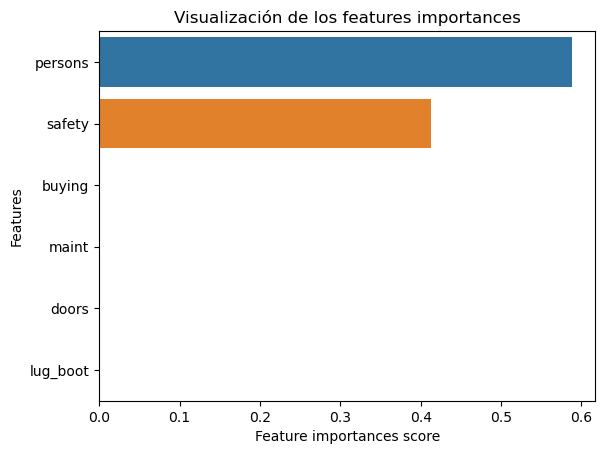

In [11]:
# Graficamos las variables más importantes

sns.barplot(x = features_scores, y = features_scores.index)
plt.xlabel("Feature importances score")
plt.ylabel("Features")
plt.title("Visualización de los features importances")
plt.show()

In [12]:
# Vemos otras métricas de medición 

print(classification_report(y_test, y_test_pred_tree))

              precision    recall  f1-score   support

         acc       0.52      1.00      0.69       118
        good       0.00      0.00      0.00        19
       unacc       1.00      0.82      0.90       358
       vgood       0.00      0.00      0.00        24

    accuracy                           0.79       519
   macro avg       0.38      0.45      0.40       519
weighted avg       0.81      0.79      0.78       519



/home/luisb/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/luisb/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/luisb/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Generamos la matriz de confusión

confusion = confusion_matrix(y_test, y_test_pred_tree)


<Axes: >

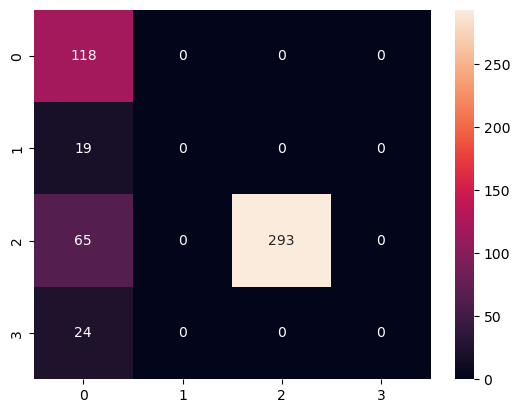

In [23]:
# Hacemos la gráfica de la matriz de confusión

sns.heatmap(confusion, annot=True, fmt='g')